In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re

sns.set_style('whitegrid')

In [2]:

from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier, Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

from xgboost import XGBClassifier
from catboost import CatBoostClassifier

from sklearn.tree import DecisionTreeClassifier

In [3]:
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix, precision_score, f1_score, roc_curve
from sklearn.model_selection import train_test_split, cross_val_predict, GridSearchCV

![image](image/titanic.jpeg)

- https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
- https://towardsdatascience.com/cross-validation-in-machine-learning-72924a69872f
- https://docs.aws.amazon.com/pt_br/machine-learning/latest/dg/cross-validation.html

In [4]:
df_train = pd.read_csv("data/train.csv")
df_test = pd.read_csv("data/test.csv")
df_combine = pd.concat([df_train, df_test])#, axis = 1)

| Variable |      Definition      |       Key       |
|----------|:--------------------:|----------------:|
| survival |  Survival            | 0 = No, 1 = Yes |
| sex      |	Sex	| |
| Age |	Age in years	| |
| sibsp |	# of siblings / spouses aboard the Titanic	| |
| parch |	# of parents / children aboard the Titanic	| |
| ticket |	Ticket number	| |
| fare |	Passenger fare	| |
| cabin |	Cabin number	| |
| embarked |	Port of Embarkation	| C = Cherbourg, Q = Queenstown, S = Southampton|

In [5]:
df_combine.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df_combine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [7]:
df_combine.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [8]:
df_combine.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

# Survived

In [9]:
print("% of who survived:", round(df_combine['Survived'].mean() * 100, 2), "%")
print("% of who not survived:",round((1 - df_combine['Survived'].mean()) * 100, 2), "%")

% of who survived: 38.38 %
% of who not survived: 61.62 %


### Class survived

In [10]:
df_combine[['Pclass', 'Survived']].groupby(['Pclass']).mean().sort_values(by='Survived', ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


### Sex survived

In [11]:
df_combine[["Sex", "Survived"]].groupby(['Sex']).mean().sort_values(by='Survived', ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


### Sibling and Spouse  survived

In [12]:
df_combine[["SibSp", "Survived"]].groupby(['SibSp']).mean().sort_values(by='Survived', ascending=False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


## FamilySize 

In [13]:
df_combine[["Parch", "Survived"]].groupby(['Parch']).mean().sort_values(by='Survived', ascending=False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000
9,NaN


In [14]:
df_combine['FamilySize'] = df_combine['SibSp'] + df_combine['Parch'] + 1

df_combine[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


###  Parent and Child survived

In [15]:
df_combine['IsAlone'] = 0
df_combine.loc[df_combine['FamilySize'] == 1, 'IsAlone'] = 1

df_combine[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


### Filter Embarked


In [16]:
# Calcula o porto mais frequente
freq_port = df_combine['Embarked'].dropna().mode()[0]

# Preenche NaNs com o porto mais frequente
df_combine['Embarked'] = df_combine['Embarked'].fillna(freq_port)

# Seu código original
df_combine[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


### Conclusion
Only 38% survived the crash. In this way we must look for correlations between the items we have. Analyze by pivoting features:
- **Sex:** Women make up 35% of the crew. Even with a smaller presence, 74% of them survived;
- **Pclass:** There is a correlation between the survivors, with the classification of their cabins;
- **SibSp and Parch:** These features have zero correlation. It will be necessary to change the data

## Plot for Age

<Figure size 2000x1000 with 0 Axes>

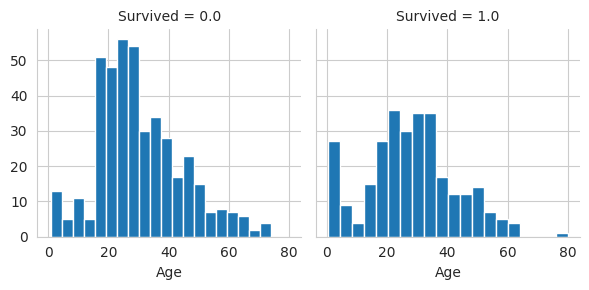

In [17]:
plt.figure(figsize=(20,10))
g = sns.FacetGrid(df_combine, col='Survived')
g.map(plt.hist, 'Age', bins=20)


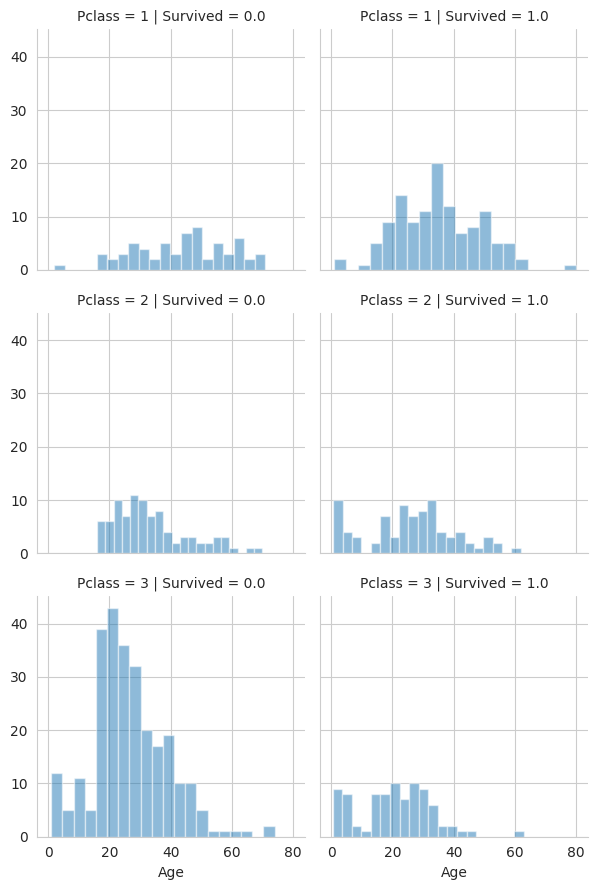

In [18]:
grid = sns.FacetGrid(df_combine, col='Survived', row='Pclass')
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

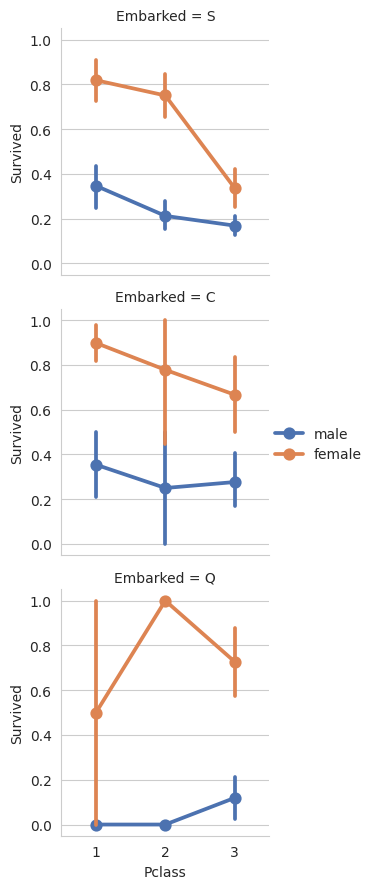

In [19]:
# Determine a order and hue_order based on your data
pclass_order = sorted(df_combine['Pclass'].unique())
sex_order = ['male', 'female']  # or ['female', 'male'], dependendo da sua preferência

grid = sns.FacetGrid(df_combine, row='Embarked')
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep', order=pclass_order, hue_order=sex_order)
grid.add_legend()

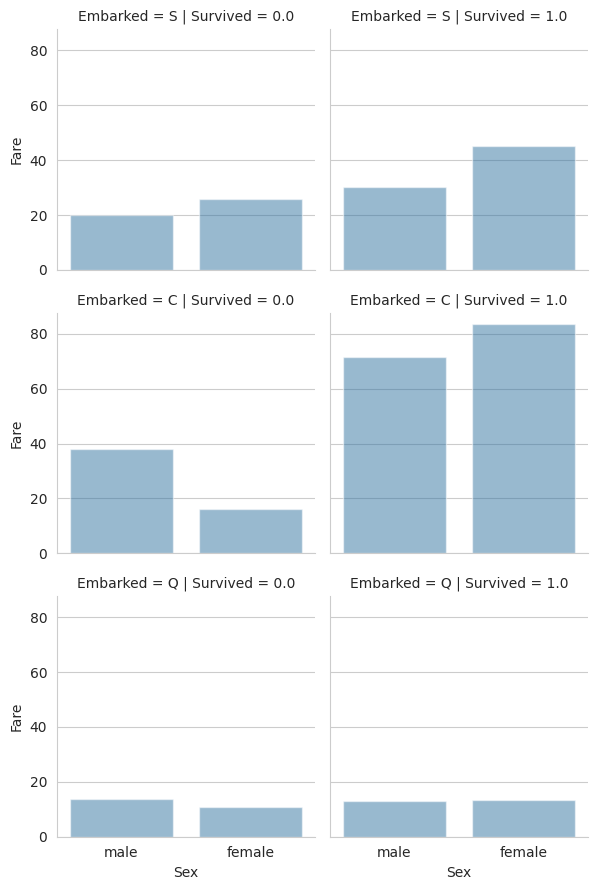

In [20]:
# Determine the order based on your data
sex_order = ['male', 'female']  # Ou ['female', 'male'], dependendo da sua preferência

grid = sns.FacetGrid(df_combine, row='Embarked', col='Survived')
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, errorbar=None, order=sex_order)
grid.add_legend()

## Filter Title

In [21]:
df_combine['Title'] = df_combine['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())
df_combine['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [22]:
df_combine['Title'].value_counts()

Title
Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: count, dtype: int64

In [23]:
df_combine['Title'] = [n if n in ["Mr", "Miss", "Mrs", "Master"] else 'Person' for n in df_combine['Title']]
df_combine['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Person'], dtype=object)

In [24]:
df_combine.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1,Mr


### Filter Age

In [25]:
df_combine['Age'].fillna(df_combine['Age'].median(), inplace=True)
df_combine['AgeBand'] = pd.cut(df_combine['Age'], 5)
df_combine[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False, observed=True).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(0.0902, 16.136]",0.550000
1,"(16.136, 32.102]",0.344168
2,"(32.102, 48.068]",0.404255
3,"(48.068, 64.034]",0.434783
4,"(64.034, 80.0]",0.090909


In [26]:
df_combine.loc[ df_combine['Age'] <= 16, 'Categori_Age'] = 0
df_combine.loc[(df_combine['Age'] > 16) & (df_combine['Age'] <= 32), 'Categori_Age'] = 1
df_combine.loc[(df_combine['Age'] > 32) & (df_combine['Age'] <= 48), 'Categori_Age'] = 2
df_combine.loc[(df_combine['Age'] > 48) & (df_combine['Age'] <= 64), 'Categori_Age'] = 3
df_combine.loc[(df_combine['Age'] >= 64), 'Categori_Age'] = 4

In [27]:
df_combine['Categori_Age'].value_counts()

Categori_Age
1.0    787
2.0    269
0.0    134
3.0    101
4.0     18
Name: count, dtype: int64

In [28]:
df_combine['Age*Class'] = df_combine.Categori_Age * df_combine.Pclass
df_combine.loc[:, ['Age*Class', 'Categori_Age', 'Pclass']].head(10)

,Age*Class,Categori_Age,Pclass
0,3.0,1.0,3
1,2.0,2.0,1
2,3.0,1.0,3
3,2.0,2.0,1
4,6.0,2.0,3
5,3.0,1.0,3
6,3.0,3.0,1
7,0.0,0.0,3
8,3.0,1.0,3
9,0.0,0.0,2


In [29]:
df_combine['FareBand'] = pd.qcut(df_combine['Fare'], 4)
df_combine[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False, observed=True).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.896]",0.197309
1,"(7.896, 14.454]",0.303571
2,"(14.454, 31.275]",0.441048
3,"(31.275, 512.329]",0.600000


In [30]:
# 1. Preenchendo NaNs
df_combine['Fare'].fillna(df_combine['Fare'].median(), inplace=True)

# 2. Verificando valores infinitos (opcional, mas uma boa prática)
if not np.isfinite(df_combine['Fare']).all():
    # Trate os valores infinitos como você achar melhor. Aqui, estou substituindo-os pela mediana
    median_fare = df_combine['Fare'].median()
    df_combine['Fare'] = df_combine['Fare'].replace([np.inf, -np.inf], median_fare)

# 3. Execute seu código original
df_combine.loc[ df_combine['Fare'] <= 7.91, 'Fare'] = 0
df_combine.loc[(df_combine['Fare'] > 7.91) & (df_combine['Fare'] <= 14.454), 'Fare'] = 1
df_combine.loc[(df_combine['Fare'] > 14.454) & (df_combine['Fare'] <= 31), 'Fare']   = 2
df_combine.loc[ df_combine['Fare'] > 31, 'Fare'] = 3
df_combine['Fare'] = df_combine['Fare'].astype(int)

df_combine = df_combine.drop(['FareBand'], axis=1)

df_combine.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Title,AgeBand,Categori_Age,Age*Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,0,NaN,S,2,0,Mr,"(16.136, 32.102]",1.0,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,3,C85,C,2,0,Mrs,"(32.102, 48.068]",2.0,2.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,1,NaN,S,1,1,Miss,"(16.136, 32.102]",1.0,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3,C123,S,2,0,Mrs,"(32.102, 48.068]",2.0,2.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,1,NaN,S,1,1,Mr,"(32.102, 48.068]",2.0,6.0
5,6,0.0,3,"Moran, Mr. James",male,28.0,0,0,330877,1,NaN,Q,1,1,Mr,"(16.136, 32.102]",1.0,3.0
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,3,E46,S,1,1,Mr,"(48.068, 64.034]",3.0,3.0
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,2,NaN,S,5,0,Master,"(0.0902, 16.136]",0.0,0.0
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,1,NaN,S,3,0,Mrs,"(16.136, 32.102]",1.0,3.0
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,2,NaN,C,2,0,Mrs,"(0.0902, 16.136]",0.0,0.0


### Construct Data test and training

In [31]:
pclass = pd.get_dummies(df_combine['Pclass'], prefix = 'Pclass', drop_first=True)
title = pd.get_dummies(df_combine['Title'], prefix = 'Title', drop_first=True)
sex = pd.get_dummies(df_combine['Sex'], prefix = 'Sex', drop_first=True)
age = pd.get_dummies(df_combine['Age'], prefix = 'Age', drop_first=True)
fare = pd.get_dummies(df_combine['Fare'], prefix = 'Fare', drop_first=True)
embarked = pd.get_dummies(df_combine['Embarked'], prefix = 'Embarked', drop_first=True)
age_class = pd.get_dummies(df_combine['Age*Class'], prefix = 'Age*Class', drop_first=True)

In [32]:
df_concat = pd.concat([df_combine['Survived'], 
                       pclass, 
                       title, 
                       sex, 
                       age, 
                       fare, 
                       embarked], axis=1)

In [33]:
train = df_concat[:len(df_train)].copy()
test = df_concat[(len(df_combine) - len(df_test)):].copy()
df_concat.shape, train.shape, test.shape

((1309, 110), (891, 110), (418, 110))

In [34]:
X_train = train.drop('Survived', axis = 1)
y_train = train['Survived'] 
X_test = test.drop("Survived", axis=1).copy()
# y_test
X_train.shape, y_train.shape, X_test.shape

((891, 109), (891,), (418, 109))

In [35]:
def benchmark_ml(algorithms, X_train, y_train, cross_validation):
    benchmark_ml = []

    for algorithm_name, algorithm in algorithms.items():
        # print(algorithm_name, algorithm)
        model = algorithm.fit(X_train, y_train)
        accuracy = round(model.score(X_train, y_train) * 100, 2)
        
        train_predict = cross_val_predict(algorithm, X_train, y_train, cv= cross_validation, n_jobs = -1)
        accuracy_cross_validation = round(accuracy_score(y_train, train_predict) * 100, 2)
        recall_score_cross_validation = round(recall_score(y_train, train_predict) * 100, 2)
        precision_score_cross_validation = round(precision_score(y_train, train_predict) * 100, 2)
        f1_score_cross_validation = round(f1_score(y_train, train_predict) * 100, 2)
        
        # confusion_matrix_cross_validation = confusion_matrix(y_train, train_predict)
        # roc_curve_cross_validation = roc_curve(y_train, train_predict)
        
        benchmark_ml.append({'algorithm': algorithm_name,
                             'accuracy (%)': accuracy,
                             'accuracy_cross_validation (%)': accuracy_cross_validation,
                             'recall_score' : recall_score_cross_validation,
                             'precision_score' : precision_score_cross_validation,
                             'f1_score' : f1_score_cross_validation,
                            #  'confusion_matrix' : confusion_matrix_cross_validation,
                            #  'roc_curve' : roc_curve_cross_validation,
                             
                             })
    df_benchmark = pd.DataFrame(benchmark_ml)
    return df_benchmark.sort_values('accuracy_cross_validation (%)', ascending=False)

In [36]:
algorithms = {'Logistic Regression' : LogisticRegression(max_iter = 1000, random_state=42),
              'Decision Tree' : DecisionTreeClassifier(random_state=42),
              'SVM' : SVC(random_state=42),
              'NuSVC' : NuSVC(random_state=42),
              'LinearSVC' : LinearSVC(dual = False, random_state=42),
              'GaussianNB' : GaussianNB(),
              'MultinomialNB' : MultinomialNB(),
              'ComplementNB' : ComplementNB(),
              # 'KNeighborsClassifier' : KNeighborsClassifier(n_clusters=3, n_init=1000),
            #   'KMeans' : KMeans(),
              'Random Forest' : RandomForestClassifier(n_estimators=100, random_state=42),
              'GradientBoostingClassifier' : GradientBoostingClassifier(random_state=42),
              'XGBoost' : XGBClassifier(random_state=42 , n_jobs = -1),
              'CatBoostClassifier' : CatBoostClassifier(random_state=42),
              'Stochastic Gradient Decent' : SGDClassifier(random_state=42), 
              'Perceptron' : Perceptron(random_state=42),
              # 'Linear Regression' : LinearRegression(),
              }

cross_validation = 5

In [37]:
result = benchmark_ml(algorithms, X_train, y_train, cross_validation)
result

Learning rate set to 0.009807
0:	learn: 0.6878282	total: 48ms	remaining: 48s
1:	learn: 0.6822627	total: 49.4ms	remaining: 24.6s
2:	learn: 0.6759916	total: 50.3ms	remaining: 16.7s
3:	learn: 0.6705625	total: 51.2ms	remaining: 12.8s
4:	learn: 0.6649028	total: 52.1ms	remaining: 10.4s
5:	learn: 0.6596770	total: 52.8ms	remaining: 8.75s
6:	learn: 0.6545964	total: 53.5ms	remaining: 7.59s
7:	learn: 0.6488693	total: 54.3ms	remaining: 6.73s
8:	learn: 0.6457658	total: 54.6ms	remaining: 6.02s
9:	learn: 0.6406207	total: 55.4ms	remaining: 5.48s
10:	learn: 0.6356635	total: 56.3ms	remaining: 5.06s
11:	learn: 0.6310002	total: 57.4ms	remaining: 4.72s
12:	learn: 0.6264389	total: 58.4ms	remaining: 4.43s
13:	learn: 0.6218725	total: 59.3ms	remaining: 4.17s
14:	learn: 0.6177093	total: 60ms	remaining: 3.94s
15:	learn: 0.6145170	total: 60.7ms	remaining: 3.73s
16:	learn: 0.6118546	total: 61.3ms	remaining: 3.54s
17:	learn: 0.6080230	total: 61.7ms	remaining: 3.37s
18:	learn: 0.6051405	total: 62.3ms	remaining: 3.21

,algorithm,accuracy (%),accuracy_cross_validation (%),recall_score,precision_score,f1_score
10,XGBoost,88.89,81.48,69.01,80.00,74.10
11,CatBoostClassifier,87.77,81.37,64.91,82.84,72.79
2,SVM,85.75,81.14,64.62,82.46,72.46
9,GradientBoostingClassifier,86.98,80.81,65.50,80.87,72.37
0,Logistic Regression,83.50,80.70,70.76,77.07,73.78
4,LinearSVC,84.40,80.47,72.51,75.61,74.03
8,Random Forest,93.83,80.47,70.18,76.92,73.39
1,Decision Tree,93.83,79.69,68.13,76.39,72.02
3,NuSVC,79.80,79.24,68.71,75.08,71.76
12,Stochastic Gradient Decent,79.57,78.79,68.71,74.13,71.32


In [38]:
params = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 3],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}
cross_validation = 5

In [39]:
best_algorithm = algorithms[result.iloc[0]['algorithm']]
# best_algorithm = GradientBoostingClassifier()

cross_validation = GridSearchCV(estimator = best_algorithm, param_grid = params, cv = cross_validation, n_jobs = -1)

In [41]:
cross_validation.fit(X_train, y_train)

# accuracy         
round(cross_validation.best_score_ * 100, 4)

82.8272

In [42]:
# #best parameters
cross_validation.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=-1,
              num_parallel_tree=None, random_state=42, ...)

In [43]:
best_algorithm_predict = cross_validation.predict(X_test)
solution = pd.DataFrame({'PassengerId' : df_test['PassengerId'], 
                         'Survived' : best_algorithm_predict.astype(int)})

solution.to_csv('data/solution/test.csv', index = False)